<a href="https://colab.research.google.com/github/johnsonadam187/binance_trader_app/blob/Dev/Binance_trader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Authentication


In [1]:
api_key = 'Buw50cp1iDCVR9ErLEgSsn2Y0Yk4ToVH1tbsZxQO2FLJOxdkgKwzTyui4tHx60vl'
secret_key  = 'UkW9eYi3X47Q0Pi1ZER6OK80vBmzX7cIXtpCqBI4FSGrzQIwyuKC00aPemBHmQ3K'

In [2]:
!pip install python-binance mplfinance 

     |████████████████████████████████| 61kB 3.5MB/s 
     |████████████████████████████████| 71kB 4.2MB/s 
     |████████████████████████████████| 1.3MB 25.8MB/s 
     |████████████████████████████████| 112kB 19.4MB/s 
     |████████████████████████████████| 286kB 42.7MB/s 
     |████████████████████████████████| 184kB 39.7MB/s 
     |████████████████████████████████| 143kB 43.1MB/s 
     |████████████████████████████████| 296kB 41.4MB/s 


In [3]:
import pandas as pd
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager

In [4]:
client = Client(api_key, secret_key)

Get Data


In [5]:
tickers = client.get_all_tickers()


In [6]:
df1 = pd.DataFrame(tickers)
df1.set_index('symbol', inplace=True)


In [7]:
def get_depth_df(Client, name="ETHBTC"):
  depth = Client.get_order_book(symbol=name)
  df_bids = pd.DataFrame(depth['bids'])
  df_bids.columns = ['Bid_Price', 'Bid_Volume']
  df_asks = pd.DataFrame(depth['asks'])
  df_asks.columns = ['Ask_Price', 'Ask_Volume']
  bids_and_asks = pd.concat([df_bids, df_asks], axis=1)
  bids_and_asks.index = pd.DataFrame(depth)['lastUpdateId']
  for column in bids_and_asks.columns:
    bids_and_asks[column] = pd.to_numeric(bids_and_asks[column])
  return bids_and_asks


In [8]:
df_btc = get_depth_df(client, 'BTCUSDT')


In [18]:
def get_historic_data(Client, name='BTCUSDT', interval = Client.KLINE_INTERVAL_1DAY, date='1 Jan 2011'):
  history = Client.get_historical_klines(name, interval, date)
  df_cols = ['Open Time', 'Open', 'High', "Low", 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'buy base asset volume', 'buy quote asset volume', 'Ignore']
  history_df = pd.DataFrame(history)
  history_df.columns = df_cols
  date_col_list = ['Open Time', 'Close Time']
  for column in history_df.columns:
    if column not in date_col_list:
      history_df[column] = pd.to_numeric(history_df[column])
    else:
      history_df[column] = pd.to_datetime(history_df[column]/1000, unit='s')
  history_df.set_index('Close Time', inplace=True)
  return history_df

In [19]:
btc_history = get_historic_data(client)
btc_history

,Open Time,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,buy base asset volume,buy quote asset volume,Ignore
Close Time,,,,,,,,,,,
2017-08-17 23:59:59.999000072,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,3.454770e+06,3427,616.248541,2.678216e+06,8733.911395
2017-08-18 23:59:59.999000072,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,5233,972.868710,4.129123e+06,9384.141409
2017-08-19 23:59:59.999000072,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,1.549484e+06,2153,274.336042,1.118002e+06,9184.085529
2017-08-20 23:59:59.999000072,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,1.930364e+06,2321,376.795947,1.557401e+06,10125.414084
2017-08-21 23:59:59.999000072,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,2.797232e+06,3972,557.356107,2.255663e+06,11706.769970
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-13 23:59:59.999000072,2021-06-13,35546.12,39380.00,34757.00,39020.57,86921.025555,3.208992e+09,1894103,45675.273616,1.688611e+09,0.000000
2021-06-14 23:59:59.999000072,2021-06-14,39020.56,41064.05,38730.00,40516.29,108522.391949,4.320308e+09,2185089,53645.908744,2.135286e+09,0.000000
2021-06-15 23:59:59.999000072,2021-06-15,40516.28,41330.00,39506.40,40144.04,80679.622838,3.247747e+09,1931890,39428.829726,1.587382e+09,0.000000


In [25]:
import mplfinance as mpf
import matplotlib.pyplot as plt


In [43]:
market_colors = mpf.make_marketcolors(up='chartreuse', down='orangered', wick={'up':'chartreuse', 'down':'orangered'}, volume='inherit', ohlc='inherit')
mav_colours = ['chartreuse', 'orangered']
thinkorswim_style = mpf.make_mpf_style(base_mpl_style="dark_background", marketcolors=market_colors, mavcolors=mav_colours, gridstyle='dashed')


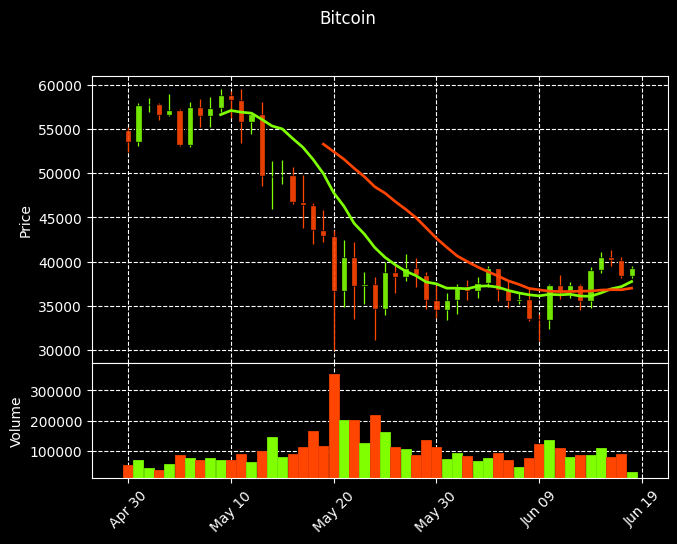

In [44]:
mpf.plot(btc_history.tail(50), type='candle', volume=True, title="Bitcoin", mav=(10, 20), style=thinkorswim_style, show_nontrading=True)